# Implement linear regression with Ridge regularization using Gradient descent method

In [1]:
import numpy as np
from sklearn import datasets, metrics 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

Loading,splitting the dataset and printing the shape of X_train and X_test

In [2]:
X, y = datasets.load_boston(return_X_y=True) 
X_train_temp1=X[0:400,:] 
X_train=np.zeros((X_train_temp1.shape[0],X_train_temp1.shape[1]+1)) 
X_train[:,0]=np.ones((X_train_temp1.shape[0])) 
X_train[:,1:]=X_train_temp1 
print("Type of X_train:", type(X_train), "Shape of X_train:", X_train.shape) 
y_train=y[0:400] 
X_test_temp1=X[400:506,:] 
X_test=np.zeros((X_test_temp1.shape[0],X_test_temp1.shape[1]+1))
X_test[:,0]=np.ones((X_test_temp1.shape[0])) 
X_test[:,1:]=X_test_temp1 
print("Type of X_test:", type(X_test), "Shape of X_test:", X_test.shape) 
y_test=y[400:506] 

Type of X_train: <class 'numpy.ndarray'> Shape of X_train: (400, 14)
Type of X_test: <class 'numpy.ndarray'> Shape of X_test: (106, 14)


Peform scailing of the dataset

In [3]:
scaler=StandardScaler() 
scaler.fit(X_train[:,1:]) 
X_train[:,1:]=scaler.transform(X_train[:,1:]) 
X_test[:,1:]=scaler.transform(X_test[:,1:])

Calculating and printing error for different value of alpha

In [5]:
alpha_value = [0.001,0.005,0.01,0.05,0.07,0.1,0.3] #different alpha value
alpha_error = {} #A dictionary to store different error for different value of alpha
theta=np.random.uniform(0,1,size=(X_train.shape[1])) #Intalizing value of thetha randomly
MAE_GD =[]
MSE_GD =[]
def linear_regression(alpha,theta):
  niterations = 100
  m=X_train.shape[0] 
  n=X_train.shape[1] 
  errorsum = []  #combine error of each iteration
  for i in errorsum:
    i=0;
  for i in range(niterations):   
    update=np.zeros(X_train.shape[1])   
    ypred=np.dot(X_train,theta)   
    error=ypred - y_train   
    for j in range(n):      #no of col
      update[j]=np.sum(error*(X_train.T)[j])   
    theta = theta - (1/m)*(alpha)*update 
    errorsum.append(np.sum(np.absolute(error))/error.shape[0])
    predictions=np.dot(X_test, theta) 
  alpha_error[alpha] = errorsum
  MAE_GD.append(metrics.mean_absolute_error(y_true=y_test,y_pred=predictions))
  MSE_GD.append(metrics.mean_squared_error(y_true=y_test,y_pred=predictions))
for value in alpha_value:
  linear_regression(value,theta)

Plotting the curve of MAE vs alpha

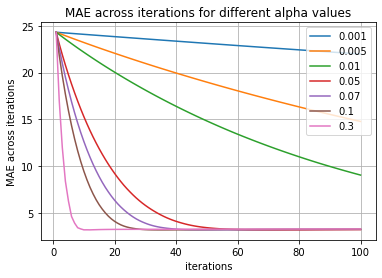

In [6]:
for key,values in alpha_error.items():
  plt.plot([i for i in range(1,101)],values,label=key) 
plt.grid()
plt.title("MAE across iterations for different alpha values")
plt.xlabel("iterations")
plt.ylabel("MAE across iterations")
plt.legend()
plt.show()

We can say best value of alpha is 0.3

Calculating training and testing error for different values of lamda

In [9]:
train_error=[]  #list for saving all training error
test_error = [] #list for saving all testing error
lamdas = [1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150] #different lamda values
inital_theta = np.random.uniform(0,1,size=(X_train.shape[1])) #intializing thetha randomly
for lamda in lamdas:
  alpha = 0.3 #from result of previous experiment
  theta=inital_theta  
  niterations = 100
  m=X_train.shape[0] 
  n=X_train.shape[1] 
  for i in range(niterations):   
    update=np.zeros(X_train.shape[1])   
    ypred=np.dot(X_train,theta)   
    error=ypred - y_train   
    for j in range(n):      
      update[j]=np.sum(error*((X_train.T)[j]))   
    theta[0] = theta[0] - (1/m)*(alpha)*update[0]
    theta[1:] = theta[1:]*(1- alpha*lamda/m) - (1/m)*alpha*update[1:]
  predictions=np.dot(X_test, theta) 
  train_error.append(metrics.mean_squared_error(y_true=y_train,y_pred=ypred))
  test_error.append(metrics.mean_squared_error(y_true=y_test,y_pred=predictions))

Plotting the curve of error `vs lambda values

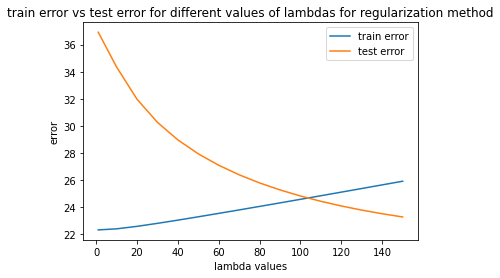

In [11]:
plt.plot(lamdas,train_error,label="train error")
plt.plot(lamdas,test_error,label = "test error")
plt.xlabel("lambda values")
plt.ylabel("error")
plt.title("train error vs test error for different values of lambdas for regularization method")
plt.legend()

As both train and test curve intersect at 100, we can say best value for lambda is 100